# Лабораторная работа 3. Итеративные и рекурсивные алгоритмы

Вариант: 16

In [37]:
from copy import deepcopy
import time

**Цель работы:** изучить рекурсивные алгоритмы и рекурсивные структуры данных; научиться проводить анализ итеративных и рекурсивных процедур; исследовать эффективность итеративных и  рекурсивных процедур при реализации на ПЭВМ.

**Задача:** Реализуйте рекурсивный алгоритм, распечатывающий все перестановки натуральных чисел  1,2,…,𝑁
 . по одному разу. Перестановка - последовательность длины  𝑁
 , в которую каждое из этих чисел входит по одному разу.

## Задание 1

### Реализация алгоритма

In [38]:
def gen_all_permutations(size: int, print_borders = False) -> list:
    permuts = []
    numbers = [x + 1 for x in range(size)]
    def permute(arr, left: int, right: int):
        if (left == right):
            permuts.append(deepcopy(arr))
        else:
            for i in range(left, right + 1):
                arr[left], arr[i] = arr[i], arr[left]
                if print_borders:
                    print('l', left+1, 'r', right)
                permute(arr, left + 1, right)
                arr[left], arr[i] = arr[i], arr[left]
    permute(numbers, 0, len(numbers) - 1)
    return permuts

print(gen_all_permutations(3))

[[1, 2, 3], [1, 3, 2], [2, 1, 3], [2, 3, 1], [3, 2, 1], [3, 1, 2]]


### Псевдокод

```
std::vector<std::pair<std::vector<int>, bool>> gen_all_permutations(int size) {
    std::vector<std::vector<int>> result;
    std::vector<int> range;
    range.resize(size);
    std::iota(range.begin(), range.end(), 1);
    std::function<void(std::vector<int> &vec, int l, int r)> permute = [&permute, &result] (std::vector<int> &vec, int l, int r) {
        if (l == r) {
            result.push_back(vec);
        } else {
            for (int i = l; i <= r; i++) {
                std::swap(vec[l], vec[i]);
                permute(vec, l + 1, r);
                std::swap(vec[l], vec[i]);
            }
        }
    };
    permute(range, 0, range.size() - 1);
    return result;
}
```

### Тесты

In [39]:
assert gen_all_permutations(3) == [[1, 2, 3], [1, 3, 2], [2, 1, 3], [2, 3, 1], [3, 2, 1], [3, 1, 2]], 'Ошибка при генерации перестановок'

assert gen_all_permutations(0) == [], 'Ошибка при перестаноки 0 элементов'

## Задание 2

### Реализация функции без рекурсии

In [41]:
def gen_permuts_without_rec(size):
    arr = []
    arr.extend([x + 1 for x in range(size)])
    def inner_func(arr):
        result = []
        if len(arr) == 2:
            return [[arr[0], arr[1]],
                    [arr[1], arr[0]]]
        else:
            tmp = []
            for k in arr:
                tmp.append(k)
                for x in inner_func([y for x in arr if x != k and (y := x)]):
                    tmp.extend(x)
                    result.append(tmp)
                    tmp = tmp[0:1:]
                tmp.clear()
        return result
    return inner_func(arr)

gen_permuts_without_rec(3)

[[1, 2, 3], [1, 3, 2], [2, 1, 3], [2, 3, 1], [3, 1, 2], [3, 2, 1]]

## Задание 3

### Блок-схема

![img](permuts.jpg)

### Оценка верхней границы

In [6]:
gen_all_permutations(20)

MemoryError: 

In [ ]:
gen_permuts_without_rec(20)

### Меморизация

С помощью декоратора memoized

In [5]:
def memoized(func):
    cache = {}
    def wrapper(n):
        if n not in cache:
            cache[n] = func(n)
        return cache[n]
    return wrapper

@memoized
def permutations(n):
    if n == 0:
        return [[]]
    else:
        result = []
        for permut in permutations(n-1):
            for i in range(n):
                result.append(permut[:i] + [n] + permut[i:])
        return result

permutations(3)

[[3, 2, 1], [2, 3, 1], [2, 1, 3], [3, 1, 2], [1, 3, 2], [1, 2, 3]]

Своими руками

In [6]:
cache = {}

def permutations(n):
    if n in cache:
        return cache[n]
    else:
        if n == 0:
            return [[]]
        else:
            result = []
            for permut in permutations(n-1):
                for i in range(n):
                    result.append(permut[:i] + [n] + permut[i:])
            cache[n] = result
            return result

for permut in permutations(4):
    print(permut)

[4, 3, 2, 1]
[3, 4, 2, 1]
[3, 2, 4, 1]
[3, 2, 1, 4]
[4, 2, 3, 1]
[2, 4, 3, 1]
[2, 3, 4, 1]
[2, 3, 1, 4]
[4, 2, 1, 3]
[2, 4, 1, 3]
[2, 1, 4, 3]
[2, 1, 3, 4]
[4, 3, 1, 2]
[3, 4, 1, 2]
[3, 1, 4, 2]
[3, 1, 2, 4]
[4, 1, 3, 2]
[1, 4, 3, 2]
[1, 3, 4, 2]
[1, 3, 2, 4]
[4, 1, 2, 3]
[1, 4, 2, 3]
[1, 2, 4, 3]
[1, 2, 3, 4]


### Сравнение производительности

In [23]:
times_rec = {}
times_without_rec = {}
times_mem = {}

**Рекурсивно без мемоизации**

In [45]:
start = time.time()

gen_all_permutations(5)

end = time.time()
t = round((end - start) * 10**3, 2)
times_rec[5] = t

In [46]:
start = time.time()

gen_all_permutations(6)

end = time.time()
t = round((end - start) * 10**3, 2)
times_rec[6] = t

In [47]:
start = time.time()

gen_all_permutations(7)

end = time.time()
t = round((end - start) * 10**3, 2)
times_rec[7] = t

In [48]:
start = time.time()

gen_all_permutations(8)

end = time.time()
t = round((end - start) * 10**3, 2)
times_rec[8] = t

**Без рекурсии без мемоизации**

In [49]:
start = time.time()

gen_permuts_without_rec(5)

end = time.time()
t = round((end - start) * 10**3, 2)
times_without_rec[5] = t

In [50]:
start = time.time()

gen_permuts_without_rec(6)

end = time.time()
t = round((end - start) * 10**3, 2)
times_without_rec[6] = t

In [51]:
start = time.time()

gen_permuts_without_rec(7)

end = time.time()
t = round((end - start) * 10**3, 2)
times_without_rec[7] = t

In [52]:
start = time.time()

gen_permuts_without_rec(8)

end = time.time()
t = round((end - start) * 10**3, 2)
times_without_rec[8] = t

**Рекурсивно с мемоизацией**

In [53]:
start = time.time()

permutations(5)

end = time.time()
t = round((end - start) * 10**3, 2)
times_mem[5] = t

In [54]:
start = time.time()

permutations(6)

end = time.time()
t = round((end - start) * 10**3, 2)
times_mem[6] = t

In [55]:
start = time.time()

permutations(7)

end = time.time()
t = round((end - start) * 10**3, 2)
times_mem[7] = t

In [56]:
start = time.time()

permutations(8)

end = time.time()
t = round((end - start) * 10**3, 2)
times_mem[8] = t

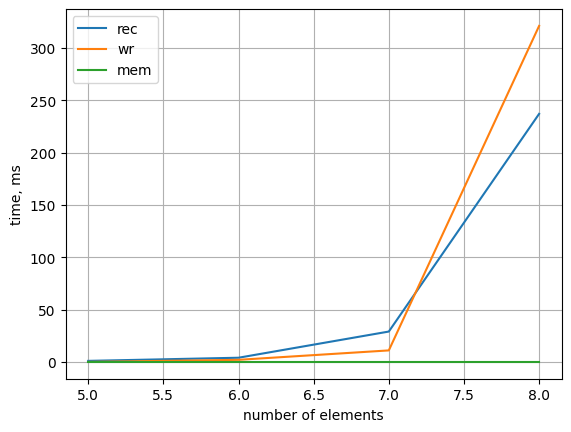

In [57]:
import matplotlib.pyplot as plt
import numpy as np
plt.plot(times_rec.keys(), times_rec.values(), times_without_rec.keys(), times_without_rec.values(), times_mem.keys(), times_mem.values())
plt.ylabel('time, ms')
plt.xlabel('number of elements')
plt.legend(["rec", "wr", "mem"])
plt.grid(True)
plt.show()
#зелёный - мем
#синий - rec
#оранжевый - без рекурсии